In [63]:
# working on real data 

In [64]:
# working on the California Housing Prices
pip install pathlib

SyntaxError: invalid syntax (1219432816.py, line 2)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
import tarfile
import urllib.request

In [66]:
# data = pd.read_csv("datasets/housing/housing.csv")

def load_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        path("datasets").mkdir(parent=True,exit_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_data()

In [67]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [68]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [69]:
housing['total_bedrooms'].value_counts().sum()

20433

In [70]:
housing.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [71]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [72]:
housing['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
1609.0     1
1591.0     1
2506.0     1
2238.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [73]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


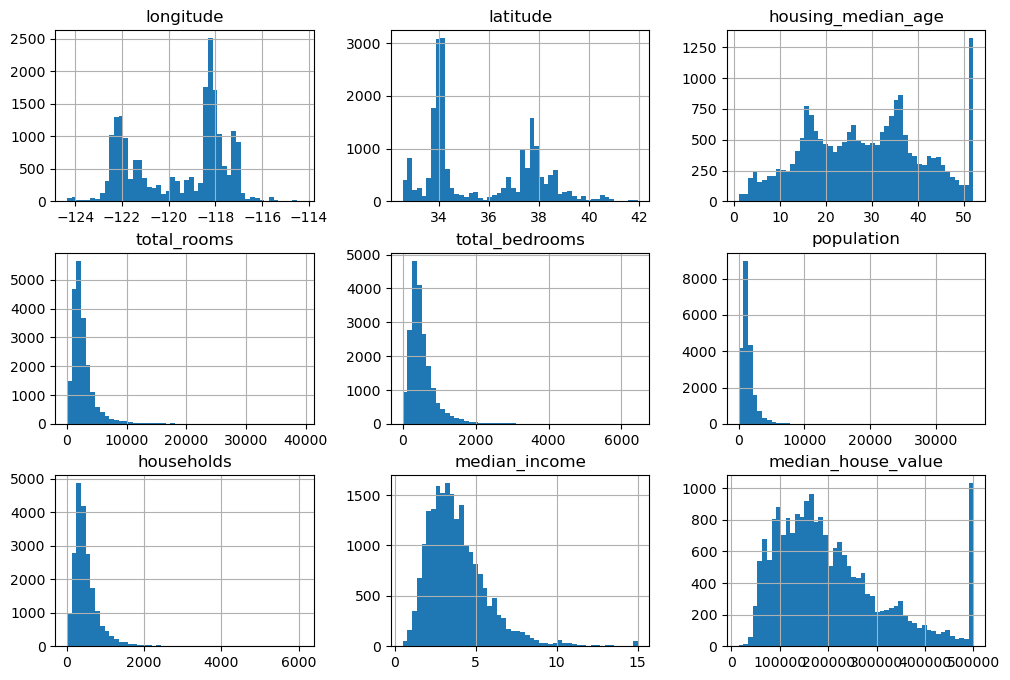

In [74]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [75]:
# create test and set

In [76]:
demo = np.random.permutation(len(housing))

In [77]:
demo

array([ 2728,  9553, 20349, ..., 15528,  4253,  8322])

In [78]:
demo = test_set_size = int(len(housing)*0.2)

In [79]:
def shuffle_and_split_data(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = shuffle_and_split_data(housing,0.2)

In [80]:
len(train_set)

16512

In [81]:
len(test_set)

4128

In [82]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13424,-119.11,35.39,22.0,984.0,176.0,451.0,170.0,3.2500,88900.0,INLAND
14956,-117.05,32.78,37.0,1184.0,178.0,529.0,192.0,4.7941,161700.0,<1H OCEAN
4016,-118.15,34.21,34.0,2765.0,515.0,1422.0,438.0,5.4727,238900.0,INLAND
1166,-118.07,34.17,35.0,2142.0,373.0,986.0,374.0,5.7051,326000.0,INLAND
18658,-121.85,36.60,21.0,2381.0,701.0,1264.0,659.0,2.5372,218000.0,<1H OCEAN


# here we can handle that evry run the dataset is same not chnages in the train/test split for that we can use seed but it better to use a hash methode

In [83]:
from zlib import crc32

In [84]:
def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier))< test_ratio**32

def split_data_with_id_hash(data,test_ratio,id_column):
    ids=data[id_column]
    print(",,,,,,ids.......",ids)
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio))
    print("...11.....",in_test_set)
    return data.iloc[:in_test_set], data.iloc[in_test_set:]

In [85]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
housing_with_index = housing.reset_index()

In [87]:
housing_with_index.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [88]:
train_set,test_set = split_data_with_id_hash(housing_with_index,0.2,"index")

,,,,,,ids....... 0            0
1            1
2            2
3            3
4            4
         ...  
20635    20635
20636    20636
20637    20637
20638    20638
20639    20639
Name: index, Length: 20640, dtype: int64
...11..... 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: index, Length: 20640, dtype: bool


TypeError: cannot do positional indexing on RangeIndex with these indexers [0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: index, Length: 20640, dtype: bool] of type Series

In [ ]:
train_set.shape

In [ ]:
test_set.shape

In [89]:
# instead of this sklearn give the methode i.e train_test_split()

In [90]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [91]:
train_set.shape

(16512, 10)

In [92]:
test_set.shape

(4128, 10)

In [93]:
# Histogram of income categories

In [94]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# pd.cut methode its create a an income category attribute with five categories label( from 1 to5)

In [95]:
housing['income_cat'] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [96]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [97]:
housing['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [98]:
# plot the graph of histogram

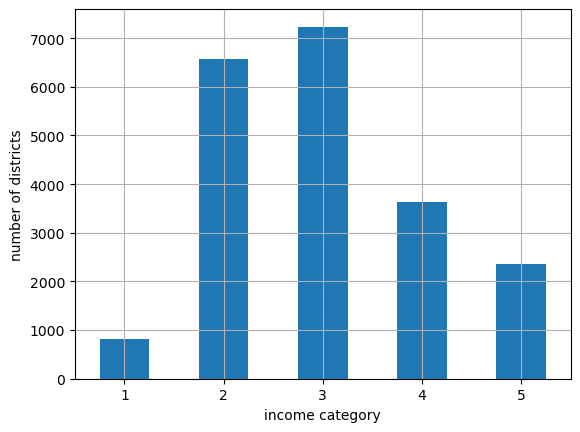

In [99]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('income category')
plt.ylabel('number of districts')
plt.show()

In [100]:
# let use split the data in mutiple times so that is performes good

In [101]:
from sklearn.model_selection import StratifiedShuffleSplit

In [102]:
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing['income_cat']):
    srat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([srat_train_set_n,strat_test_set_n])

In [103]:
start_train_set,strat_test_set = strat_splits[0]

In [104]:
start_train_set.shape

(16512, 11)

In [105]:
strat_test_set.shape

(4128, 11)

# EXPLORE AND VISUALIZE THE DATA TO GAIN INSIGHTS

In [106]:
# making the copy of train

In [107]:
housing_copy =  start_train_set.copy()

In [108]:
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [109]:
housing_copy = housing_copy.drop(columns=['income_cat'])

In [110]:
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


In [111]:
# visualizing the georaphical data

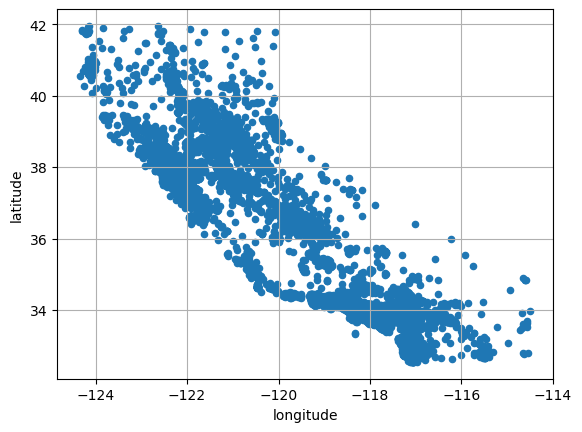

In [112]:
housing_copy.plot(kind='scatter',x='longitude',y='latitude',grid=True)
plt.show()

In [113]:
# make it for better visualization we can use alpha parameter

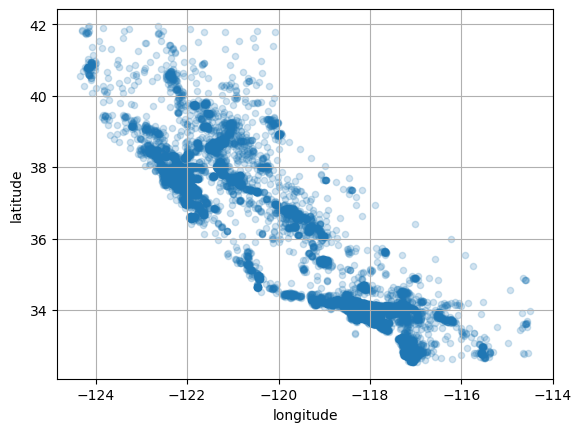

In [114]:
housing_copy.plot(kind='scatter',x='longitude',y='latitude',grid=True,alpha=0.2)
plt.show()

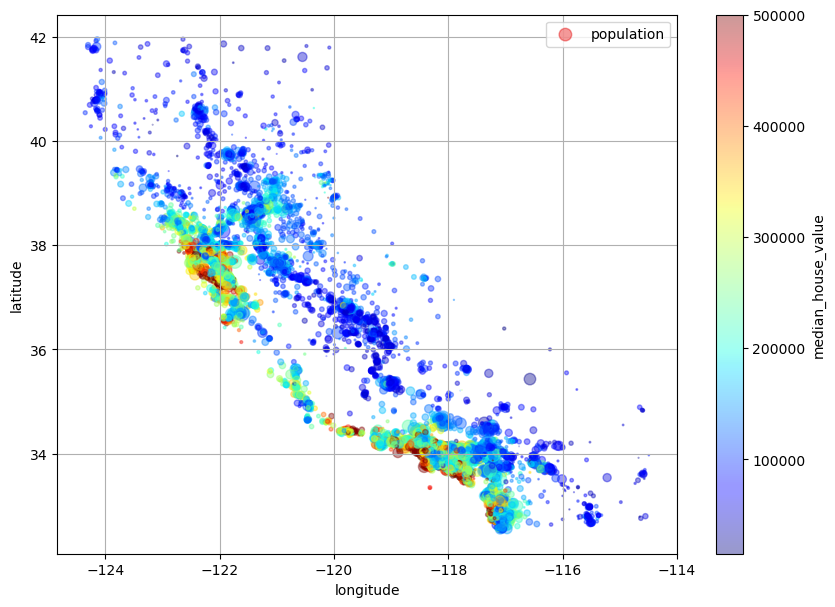

In [115]:
housing_copy.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing_copy["population"] / 100, 
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    alpha=0.4,
    figsize=(10, 7)
)

plt.legend()
plt.show()


In [116]:
# calculate the stander correlations

In [117]:

# drop the string value column i.e 'ocean_proximity'
housing_copy = housing_copy.drop(columns=['ocean_proximity'])
corr_matrix = housing_copy.corr()

In [118]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [119]:
from pandas.plotting import scatter_matrix

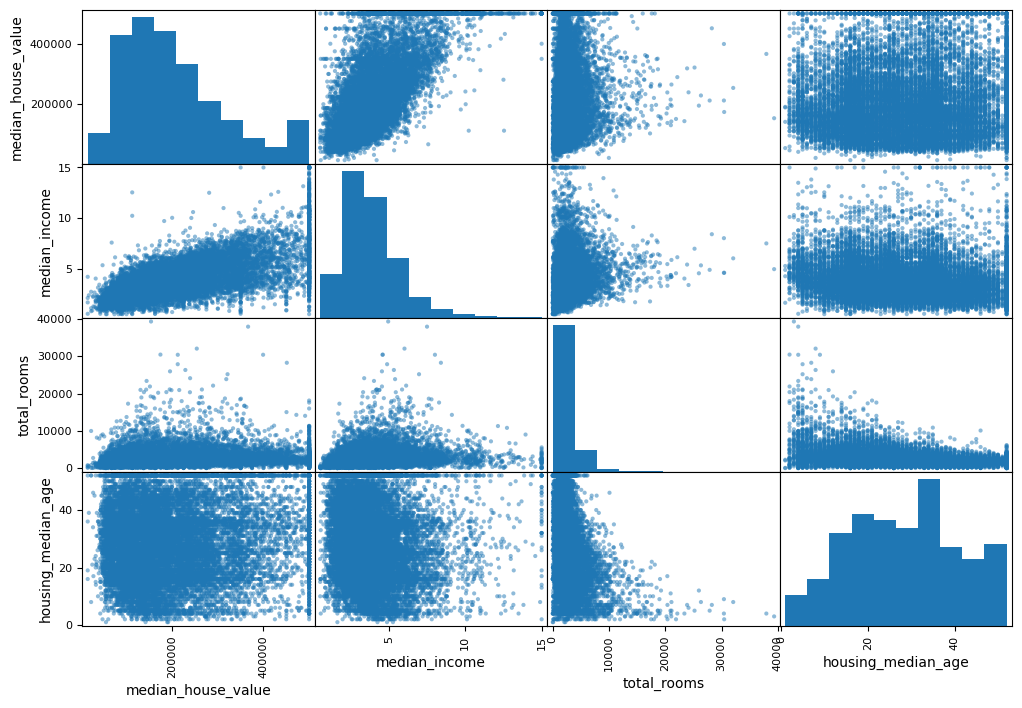

In [120]:
attrib = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing_copy[attrib],figsize=(12,8))
plt.show()

In [121]:
# experiment with attribute combination

In [122]:
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0


In [123]:
housing_copy['rooms_per_house'] = housing_copy['total_rooms']/housing_copy['households']
housing_copy['bedrooms_ratio'] = housing_copy['total_bedrooms']/housing_copy['total_rooms']
housing_copy['people_per_house'] = housing_copy['population']/housing_copy['households']

In [124]:
corr_matrix = housing_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# prepare the data for machine learning algorithm

In [125]:
housing = start_train_set.drop("median_house_value",axis=1)
housing_label = start_train_set['median_house_value'].copy()

In [126]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3


In [127]:
# lets start to clean the data

In [128]:
housing_label.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [129]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


# handle the missing value we can use the pandas library that i.e dropna,drop,fillna,or we can fill this value with some mean,median,mode

In [130]:
housing['total_bedrooms'].value_counts().sum 

<bound method Series.sum of total_bedrooms
345.0     45
348.0     43
346.0     42
295.0     41
272.0     41
          ..
1203.0     1
2190.0     1
1094.0     1
4335.0     1
1288.0     1
Name: count, Length: 1827, dtype: int64>

In [131]:
housing['total_bedrooms'].isnull().sum()

168

In [132]:
arr = np.where(housing['total_bedrooms'].isnull)

C:\Users\amank\AppData\Local\Temp\ipykernel_4160\729439011.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
  arr = np.where(housing['total_bedrooms'].isnull)


In [133]:
arr[0]

array([0], dtype=int64)

In [134]:
housing.dropna(subset='total_bedrooms'],inplace=True)  
# option-2
housing.drop('total_bedrooms',axis=1)
median = housing['total_bedrooms'].median()

# options 3
housing['total_bedrooms'].fillna(median,inplace=True)


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (472359105.py, line 1)

In [135]:
from sklearn.impute import SimpleImputer

In [136]:
SI = SimpleImputer()

In [137]:
imputer = SimpleImputer(strategy="median")

# There are three algorithm in skleanr where you can set the missing value 1.SimpleImputer,2.KNN(K-NEAREST-NEIGHBORS),3.IterativeImputer.

In [138]:
housing_num = housing.select_dtypes(include=[np.number])

In [139]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [140]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [141]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [142]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [143]:
x = imputer.transform(housing_num)

In [144]:
x[0]

array([-1.2242e+02,  3.7800e+01,  5.2000e+01,  3.3210e+03,  1.1150e+03,
        1.5760e+03,  1.0340e+03,  2.0987e+00])

# now tranfer the numpy into the dataframes

In [145]:
housing_tr = pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

In [146]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [147]:
# Now handling the text and categorical data

In [148]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3


In [149]:
housing_cat = housing[['ocean_proximity']]

In [150]:
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


# data:-  numerical and categorical :-  nominal(gender,state) and ordinal(it define the level and it give states)

In [151]:
from sklearn.preprocessing import OrdinalEncoder

In [152]:
OE = OrdinalEncoder()

In [153]:
housing_cat_encoder = OE.fit_transform(housing_cat)

In [154]:
housing_cat_encoder

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [155]:
OE.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [156]:
# use the oneHotEncoder

In [157]:
from sklearn.preprocessing import OneHotEncoder

In [158]:
OHE = OneHotEncoder()

In [159]:
housing_cat_ohe = OHE.fit_transform(housing_cat)

In [160]:
housing_cat_ohe

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [161]:
housing_cat_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [162]:
housing_cat_ohe.categories_

AttributeError: 'csr_matrix' object has no attribute 'categories_'

In [163]:
df_tests = pd.DataFrame({"ocean_proximity":["INLAND","NEAR BY"]})
pd.get_dummies(df_tests)

,ocean_proximity_INLAND,ocean_proximity_NEAR BY
0,True,False
1,False,True


In [164]:
# SACLLING OF DATA

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

In [167]:
min_max_scaler

,feature_range,"(-1, ...)"
,copy,True
,clip,False


In [168]:
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_

SyntaxError: incomplete input (1931045057.py, line 1)

In [169]:
start_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [170]:
housing_copy = start_train_set.copy()

In [171]:
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [172]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

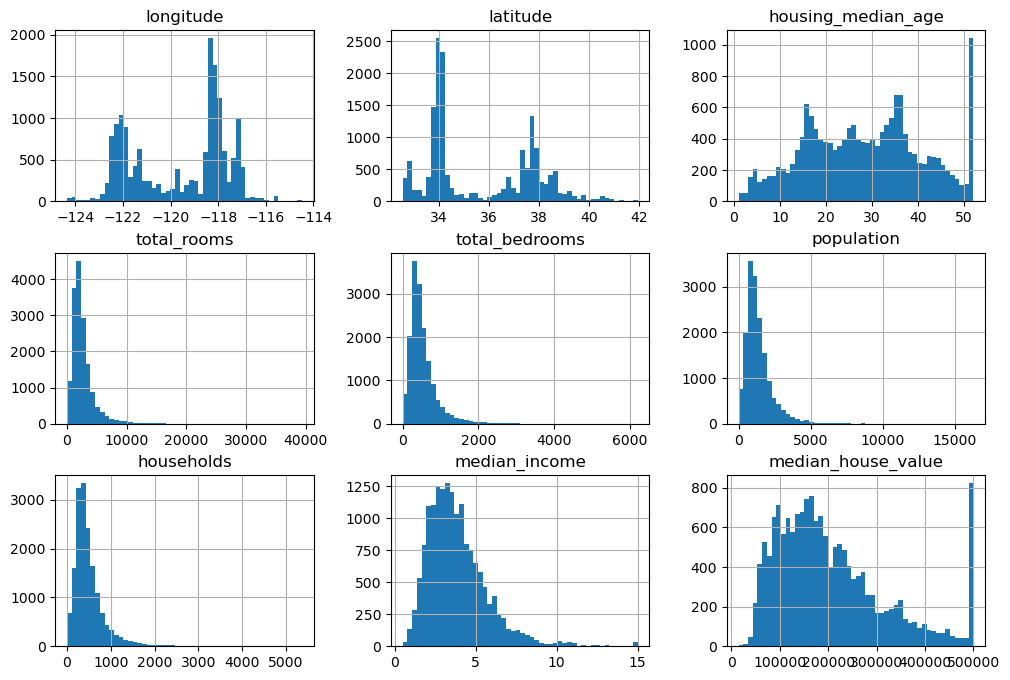

In [173]:
housing_copy.hist(bins=50,figsize=(12,8))
plt.show()

In [174]:
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_copy)

ValueError: could not convert string to float: 'NEAR BAY'

In [175]:
housing_num_min_max_scaled.hist(bins=50,figsize=(12,8))
plt.show()

NameError: name 'housing_num_min_max_scaled' is not defined

In [176]:
housing_num_min_max_scaled_df  = pd.DataFrame(
    housing_num_min_max_scaled,
    columns=housing_num.columns
)

NameError: name 'housing_num_min_max_scaled' is not defined

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
std_scaler = StandardScaler()

In [179]:
housing_copy_scaled = std_scaler.fit_transform(housing_copy)

ValueError: could not convert string to float: 'NEAR BAY'

In [180]:
housing_copy_scaled

NameError: name 'housing_copy_scaled' is not defined

In [181]:
start_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [ ]:
housing_num_min_max_scaled_df  = pd.DataFrame(
    housing_num_min_max_scaled,
    columns=housing_num.columns
)

In [183]:
from sklearn.linear_model import LinearRegression

In [186]:
target_scaler = StandardScaler()

In [ ]:
scaled_labels = target_scaler.fit_transform(housing